In [108]:
library(keras)

In [109]:
idx <- sample(1:nrow(iris), 20)
train <- iris[-idx, ]
test <- iris[idx,]
new.data <- matrix(scale(test[,1:4]), nrow=20, ncol=4)

X <- matrix(scale(train[,1:4]), nrow=130, ncol=4)
Y <- matrix(as.integer(train[,5])-1) %>%    # f..k, python start index from 0
        to_categorical(num_classes=3)      


In [110]:
rm(model)
model <- keras_model_sequential() 

In [111]:
model %>% 
    layer_dense(units = 4, activation = 'relu', input_shape = c(4)) %>% 
    layer_dense(units = 3, activation = 'softmax')

In [112]:
summary(model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_13 (Dense)                    (None, 4)                       20          
________________________________________________________________________________
dense_14 (Dense)                    (None, 3)                       15          
Total params: 35
Trainable params: 35
Non-trainable params: 0
________________________________________________________________________________


In [113]:
model %>% compile(
     loss = 'categorical_crossentropy',
     optimizer = 'adam',
     metrics = 'accuracy'
 )

In [114]:
options(keras.view_metrics = FALSE)
history <- model %>% fit(
     X, Y, 
     epochs = 200, 
     batch_size = 5, 
     validation_split = 0.2,
     callbacks = callback_tensorboard("logs/run_a"),
 )



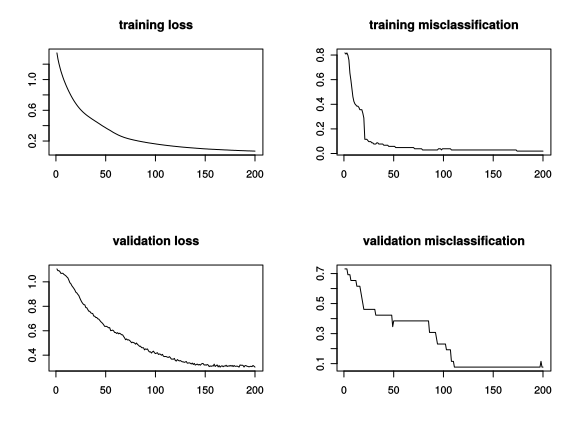

In [115]:
options(jupyter.plot_mimetypes = "image/svg+xml") 
options(repr.plot.width = 8, repr.plot.height = 6)
par(mfrow=c(2,2))
plot(history$metrics$loss, type="l", xlab="", ylab="", main="training loss")
plot(1-history$metrics$acc, type="l", xlab="", ylab="", main="training misclassification")
plot(history$metrics$val_loss, type="l", xlab="", ylab="", main="validation loss")
plot(1-history$metrics$val_acc, type="l", xlab="", ylab="", main="validation misclassification")

In [116]:
str(history)

List of 2
 $ params :List of 8
  ..$ epochs            : int 200
  ..$ verbose           : int 1
  ..$ batch_size        : int 5
  ..$ steps             : NULL
  ..$ samples           : int 104
  ..$ metrics           : chr [1:4] "loss" "acc" "val_loss" "val_acc"
  ..$ do_validation     : logi TRUE
  ..$ validation_samples: int 26
 $ metrics:List of 4
  ..$ val_acc : num [1:200] 0.269 0.269 0.269 0.308 0.308 ...
  ..$ val_loss: num [1:200] 1.11 1.09 1.09 1.08 1.07 ...
  ..$ acc     : num [1:200] 0.183 0.192 0.183 0.202 0.24 ...
  ..$ loss    : num [1:200] 1.35 1.27 1.21 1.16 1.11 ...
 - attr(*, "class")= chr "keras_training_history"


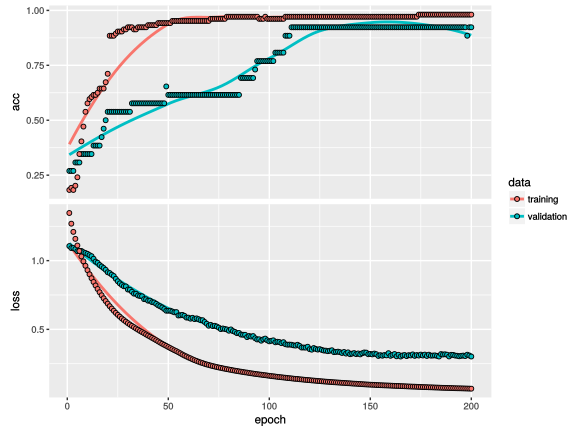

In [117]:
plot(history)

In [118]:
pred <- model %>% 
            predict_classes(new.data, batch_size=64)


In [119]:
table(test$Species, pred)

            pred
             0 1 2
  setosa     7 0 0
  versicolor 0 8 0
  virginica  0 0 5

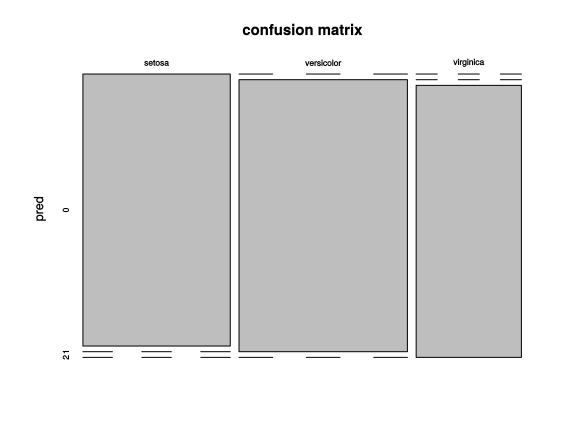

In [120]:
plot(table(test$Species, pred), main="confusion matrix")

In [121]:
tensorboard("logs/run_a")

Started TensorBoard at http://127.0.0.1:3981 
